In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-bank-dataset-project/gdp_data.csv
/kaggle/input/world-bank-dataset-project/electricity_access_percent.csv
/kaggle/input/world-bank-dataset-project/mystery.csv
/kaggle/input/world-bank-dataset-project/population_data.db
/kaggle/input/world-bank-dataset-project/population_data.csv
/kaggle/input/world-bank-dataset-project/population_data.json
/kaggle/input/world-bank-dataset-project/projects_data.csv
/kaggle/input/world-bank-dataset-project/rural_population_percent.csv
/kaggle/input/world-bank-dataset-project/population_data.xml


# **EXTRACT**

1. **EXTRACT CSV**

In [2]:
# import the projects_data.csv file using the pandas library
wb_projects = pd.read_csv('../input/world-bank-dataset-project/projects_data.csv')

/tmp/ipykernel_36/339040272.py:2: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  wb_projects = pd.read_csv('../input/world-bank-dataset-project/projects_data.csv')


The error occured because there are mixed dtypes for columns hence the data is messy..
To avoid dtype error,set all columns to string dtype.

In [3]:
#Read in the projects_data.csv file using the read_csv method and dtype = str option
wb_projects = pd.read_csv('../input/world-bank-dataset-project/projects_data.csv',dtype='str')

In [11]:
#Reads topmost 5 rows (now error is removed)
wb_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [5]:
#count of null values per column
wb_projects.isnull().sum()

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost               125
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

In [6]:
#  output the shape of the data frame
wb_projects.shape

(18248, 57)

you can use the python standard library tool 'csv.Sniffer' for quick temporary detection of csv file format automatically.

In [21]:
import csv
import pandas as pd

# Step 1: Read a small sample of the file
with open('../input/world-bank-dataset-project/population_data.csv', 'r') as f:
    sample = f.read(2048)  # Read first 2KB of data
    
    # Step 2: Detect delimiter and quoting pattern
    sniffer = csv.Sniffer()
    dialect = sniffer.sniff(sample)
    
    # Step 3: Detect if header is present
    has_header = sniffer.has_header(sample)

print("Delimiter detected:", dialect.delimiter)
print("Has header:", has_header)

# Step 4: Use results in pandas
df = pd.read_csv(
    '../input/world-bank-dataset-project/population_data.csv',
    delimiter=dialect.delimiter,
    skiprows=4 if has_header else 0  # adjust as needed
)

print(df.head())


Delimiter detected: ,
Has header: True
  Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2009  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101453.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  28004331.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  22549547.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2927519.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     84462.0   

         2010        2011        2012    

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


There is some unwanted data in first four lines of wb_population csv file.
For pandas to create proper dataframe, the values must be aligned within it.
Since here , there are some metadata in the first few lines, the 5th line has more columns than expected when pandas read it.
Hence error is shown.

In [25]:
# read in the population_data.csv file using the read_csv() method
# Put the results in a variable called wb_population
wb_population = pd.read_csv('../input/world-bank-dataset-project/population_data.csv')

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 63


In [12]:
#Printing out first few lines to see what issue might be
f = open("../input/world-bank-dataset-project/population_data.csv")
for i in range(10):
    line = f.readline()
    print('line: ', i, line)
f.close()

line:  0 ﻿"Data Source","World Development Indicators",

line:  1 

line:  2 "Last Updated Date","2018-06-28",

line:  3 

line:  4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line:  5 "Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","94

**shown that first four lines are not in proper format and doesnt contain data**


In [6]:
# Read in population data skipping first four rows
import pandas as pd
wb_population = pd.read_csv('../input/world-bank-dataset-project/population_data.csv',skiprows=4)

In [7]:
wb_population.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


every year column has at least one NaN value.

In [8]:
# Count the number of null values in each column
wb_population.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64

almost every row has only one null value probably from the 'Unnamed: 62' column that doesn't have any relevant information in it. Drop the 'Unnamed: 62' column from the data frame.

In [9]:
#count the null values by column
wb_population.isnull().sum(axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
259    1
260    1
261    1
262    1
263    1
Length: 264, dtype: int64

In [10]:
wb_population=wb_population.drop('Unnamed: 62',axis=1)

In [11]:
wb_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


2. **EXTRACT JSON**

we will try to extract the same population data in json format.

In [2]:
def print_lines(n, file_name):
    f = open(file_name)
    for i in range(n):
        print(f.readline())
    f.close()

The first line in this file is actually the entire file,JSON represents the data in dictionary-like format.

In [13]:
print_lines(1, '../input/world-bank-dataset-project/population_data.json')

[{"Country Name":"Aruba","Country Code":"ABW","Indicator Name":"Population, total","Indicator Code":"SP.POP.TOTL","1960":54211.0,"1961":55438.0,"1962":56225.0,"1963":56695.0,"1964":57032.0,"1965":57360.0,"1966":57715.0,"1967":58055.0,"1968":58386.0,"1969":58726.0,"1970":59063.0,"1971":59440.0,"1972":59840.0,"1973":60243.0,"1974":60528.0,"1975":60657.0,"1976":60586.0,"1977":60366.0,"1978":60103.0,"1979":59980.0,"1980":60096.0,"1981":60567.0,"1982":61345.0,"1983":62201.0,"1984":62836.0,"1985":63026.0,"1986":62644.0,"1987":61833.0,"1988":61079.0,"1989":61032.0,"1990":62149.0,"1991":64622.0,"1992":68235.0,"1993":72504.0,"1994":76700.0,"1995":80324.0,"1996":83200.0,"1997":85451.0,"1998":87277.0,"1999":89005.0,"2000":90853.0,"2001":92898.0,"2002":94992.0,"2003":97017.0,"2004":98737.0,"2005":100031.0,"2006":100832.0,"2007":101220.0,"2008":101353.0,"2009":101453.0,"2010":101669.0,"2011":102053.0,"2012":102577.0,"2013":103187.0,"2014":103795.0,"2015":104341.0,"2016":104822.0,"2017":105264.0},{"

**orient option** can handle JSON formatted in different ways:

'split' : dict like {index -> [index], columns -> [columns], data -> [values]}

# 'records' : list like [{column -> value}, ... , {column -> value}]

'index' : dict like {index -> {column -> value}}

'columns' : dict like {column -> {index -> value}}

'values' : just the values array

Luckily, pandas has a method to read in a json file and parse the results.


Read JSON in PANDAS

In [14]:
# Read in the population_data.json file using pandas's 
# read_json method. Don't forget to specific the orient option
# store the results in wb_json

wb_json = pd.read_json('../input/world-bank-dataset-project/population_data.json',orient='records')
wb_json.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


other way to read JSON file is to use json library.
python treats JSON data like a dictionary.

In [15]:
import json

# read in the JSON file

with open('../input/world-bank-dataset-project/population_data.json') as f:
    json_data = json.load(f)

# read the first record in the JSON file
print(json_data[0])
print('\n')

# show that JSON data is essentially a dictionary
print(json_data[0]['Country Name'])
print(json_data[0]['Country Code'])



{'Country Name': 'Aruba', 'Country Code': 'ABW', 'Indicator Name': 'Population, total', 'Indicator Code': 'SP.POP.TOTL', '1960': 54211.0, '1961': 55438.0, '1962': 56225.0, '1963': 56695.0, '1964': 57032.0, '1965': 57360.0, '1966': 57715.0, '1967': 58055.0, '1968': 58386.0, '1969': 58726.0, '1970': 59063.0, '1971': 59440.0, '1972': 59840.0, '1973': 60243.0, '1974': 60528.0, '1975': 60657.0, '1976': 60586.0, '1977': 60366.0, '1978': 60103.0, '1979': 59980.0, '1980': 60096.0, '1981': 60567.0, '1982': 61345.0, '1983': 62201.0, '1984': 62836.0, '1985': 63026.0, '1986': 62644.0, '1987': 61833.0, '1988': 61079.0, '1989': 61032.0, '1990': 62149.0, '1991': 64622.0, '1992': 68235.0, '1993': 72504.0, '1994': 76700.0, '1995': 80324.0, '1996': 83200.0, '1997': 85451.0, '1998': 87277.0, '1999': 89005.0, '2000': 90853.0, '2001': 92898.0, '2002': 94992.0, '2003': 97017.0, '2004': 98737.0, '2005': 100031.0, '2006': 100832.0, '2007': 101220.0, '2008': 101353.0, '2009': 101453.0, '2010': 101669.0, '2011'

3. **EXTRACT XML**

To see XML version format

XML is formatted with tags<> and values inside it

In [16]:
print_lines(15, '../input/world-bank-dataset-project/population_data.xml')

﻿<?xml version="1.0" encoding="utf-8"?>

<Root xmlns:wb="http://www.worldbank.org">

  <data>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1960</field>

      <field name="Value">54211</field>

    </record>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1961</field>

      <field name="Value">55438</field>

    </record>



We need to install the 'bs4' Python Package to import the Python Library 'BeautifulSoup' to parse and extract the HTML or XML files easily.

In [ ]:
!pip install bs4

*with open* is the safest way to open a file because after  it finishes the work, it closes file automatically(optional).

lxml is the parsertype that tells beautifulsoup how to read and extract html,xml files .The parser (lxml) helps interpret the XML structure into a navigable Python object.After parsing using soup=BeautifulSoup(fp, "lxml") ,the raw xml format is converted and we can extract the text contexts of the data.

In [3]:
#import the Beautiful soup library
from bs4 import BeautifulSoup

#open the population_data.xml file and load into Beautiful Soup
with open("../input/world-bank-dataset-project/population_data.xml") as fp:
    soup = BeautifulSoup(fp, "lxml")#lxml is the parser type

In [7]:
# output the first 5 records in the xml file
# this is an example of how to navigate the XML document with BeautifulSoup

i = 0
# use the find_all method to get all record tags in the document
for record in soup.find_all('record'):
    # use the find_all method to get all fields in each record
    i += 1
    for record in record.find_all('field'):
        print(record['name'], ': ' , record.text)
    print()
    if i == 5:
        break


Country or Area :  Aruba
Item :  Population, total
Year :  1960
Value :  54211

Country or Area :  Aruba
Item :  Population, total
Year :  1961
Value :  55438

Country or Area :  Aruba
Item :  Population, total
Year :  1962
Value :  56225

Country or Area :  Aruba
Item :  Population, total
Year :  1963
Value :  56695

Country or Area :  Aruba
Item :  Population, total
Year :  1964
Value :  57032



**EXTRACT DATA FROM SQL DATABASES**

You can use pandas to *open a SQL Database* or to *run SQL query against a database*.

**SQLite** is the light-weight,serverless, file based database (db engine) built in python and reads data in a single .db file itself.

**SQLite3** is the module/library that opens the file so we can read and write using SQL.
Hence, we need to connect to an existing .db file.

SQLite is mainly used for learning SQL,prototyping, for handling small datasets in computer.

In [6]:
import pandas as pd
import sqlite3

#to connect to the existing .db database
conn = sqlite3.connect('../input/world-bank-dataset-project/population_data.db')

#run a query
pd.read_sql('SELECT * FROM population_data',conn)

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [8]:
pd.read_sql('SELECT "Country_Name", "Country_Code", "1960" FROM population_data', conn)

,Country_Name,Country_Code,1960
0,Aruba,ABW,54211.0
1,Afghanistan,AFG,8996351.0
2,Angola,AGO,5643182.0
3,Albania,ALB,1608800.0
4,Andorra,AND,13411.0
...,...,...,...
259,Kosovo,XKX,947000.0
260,"Yemen, Rep.",YEM,5172135.0
261,South Africa,ZAF,17456855.0
262,Zambia,ZMB,3044846.0


**APIs**

APIs are the set of rules or tools that lets you interact with another program or service.

general format: url+endpoint+parameter

endpoint is the specific url or part of url where you send a request or access the data from.



The first entry is meta data about the results.
The second entry is another list containing data.

In [3]:
import requests
import pandas as pd

#get the url ready
url='http://api.worldbank.org/v2/countries/br;cn;us;de/indicators/SP.POP.TOTL/?format=json&per_page=1000'

#send the request
r=requests.get(url)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 1000,
  'total': 260,
  'sourceid': '2',
  'lastupdated': '2025-10-07'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2024',
   'value': 211998573,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2023',
   'value': 211140729,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2022',
   'value': 210306415,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2021',

In [4]:
pd.DataFrame(r.json()[1])

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2024,211998573,,,0
1,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2023,211140729,,,0
2,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2022,210306415,,,0
3,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2021,209550294,,,0
4,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2020,208660842,,,0
...,...,...,...,...,...,...,...,...
255,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1964,191889000,,,0
256,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1963,189242000,,,0
257,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1962,186538000,,,0
258,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1961,183691000,,,0


In [5]:
import requests
import pandas as pd

# TODO: get the url ready
url = 'http://api.worldbank.org/v2/country/CH/indicator/SP.RUR.TOTL.ZS/?format=json&date=1995:2001'

# TODO: send the request
r = requests.get(url)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 50,
  'total': 7,
  'sourceid': '2',
  'lastupdated': '2025-10-07'},
 [{'indicator': {'id': 'SP.RUR.TOTL.ZS',
    'value': 'Rural population (% of total population)'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2001',
   'value': 26.625,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.RUR.TOTL.ZS',
    'value': 'Rural population (% of total population)'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2000',
   'value': 26.617,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.RUR.TOTL.ZS',
    'value': 'Rural population (% of total population)'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '1999',
   'value': 26.562,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.RUR.TOTL.ZS',
    'value': 'Rural population

# **TRANSFORM**

**COMBINING DATA**

In [25]:
f=open("../input/world-bank-dataset-project/rural_population_percent.csv")
for i in range(10):
    line=f.readline()
    print('line:',i,line)
f.close()

line: 0 ﻿"Data Source","World Development Indicators",

line: 1 

line: 2 "Last Updated Date","2018-06-28",

line: 3 

line: 4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line: 5 "Aruba","ABW","Rural population (% of total population)","SP.RUR.TOTL.ZS","49.224","49.239","49.254","49.27","49.285","49.3","49.315","49.33","49.346","49.361","49.376","49.391","49.407","49.422","49.437","49.452","49.468","49.483","49.498","49.513","49.528","49.544","49.559","49.574","49.589","49.605","49.62","49.635","49.65","49.665","49.681","49.696","50.002","50.412","50.823","51.233","

In [6]:
wb_rural = pd.read_csv('../input/world-bank-dataset-project/rural_population_percent.csv',skiprows=4)
wb_rural.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


dropped Unnamed column of null values

In [7]:
wb_rural=wb_rural.drop('Unnamed: 62',axis=1)
wb_rural.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873


In [8]:
f=open('../input/world-bank-dataset-project/electricity_access_percent.csv')
for i in range(10):
    line=f.readline()
    print('line:',i,line)
f.close()

line: 0 ﻿"Data Source","World Development Indicators",

line: 1 

line: 2 "Last Updated Date","2018-06-28",

line: 3 

line: 4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line: 5 "Aruba","ABW","Access to electricity (% of population)","EG.ELC.ACCS.ZS","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","","88.4453506469727","88.7808456420898","89.1158294677734","89.44775390625","89.7735595703125","90.0901870727539","90.3945846557617","90.6836776733398","90.9544219970703","91.2037506103516","91.6603980031457","91.6380920410156","91.

In [9]:
wb_electricity=pd.read_csv('../input/world-bank-dataset-project/electricity_access_percent.csv',skiprows=4)
wb_electricity.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


dropped Unnamed column of null values

In [10]:
wb_electricity=wb_electricity.drop('Unnamed: 62',axis=1)
wb_electricity.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN


In [11]:
wb_concat=pd.concat([wb_rural,wb_electricity])

In [12]:
wb_concat.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873


**CLEANING THE DATA**

In [ ]:
import pandas as pd

In [13]:
wb_indicator = pd.read_csv('../input/world-bank-dataset-project/population_data.csv', skiprows=4)
wb_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
wb_projects = pd.read_csv('../input/world-bank-dataset-project/projects_data.csv', dtype=str)
wb_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

In [14]:
wb_indicator[['Country Name','Country Code']].drop_duplicates()

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
259,Kosovo,XKX
260,"Yemen, Rep.",YEM
261,South Africa,ZAF
262,Zambia,ZMB


Here, unique didnt seperate the dups because the dups are in same row and trated as acombined string.

Unique only seperate the dups in different rows.

Here, we can see that the format of wb_projects is different from that of wb_indicator because it doesn't give matching iso code column.

it would be easier to join these two datasets if wb_projects also has the ISO country abbreviations.

In [15]:
wb_projects['countryname'].unique()

array(['World;World',
       'Democratic Republic of the Congo;Democratic Republic of the Congo',
       "People's Republic of Bangladesh;People's Republic of Bangladesh",
       'Islamic  Republic of Afghanistan;Islamic  Republic of Afghanistan',
       'Federal Republic of Nigeria;Federal Republic of Nigeria',
       'Republic of Tunisia;Republic of Tunisia',
       'Lebanese Republic;Lebanese Republic',
       'Democratic Socialist Republic of Sri Lan;Democratic Socialist Republic of Sri Lan',
       'Nepal;Nepal', 'Kyrgyz Republic;Kyrgyz Republic',
       'Hashemite Kingdom of Jordan;Hashemite Kingdom of Jordan',
       'Republic of the Union of Myanmar;Republic of the Union of Myanmar',
       'Arab Republic of Egypt;Arab Republic of Egypt',
       'United Republic of Tanzania;United Republic of Tanzania',
       'Federal Democratic Republic of Ethiopia;Federal Democratic Republic of Ethiopia',
       'Burkina Faso;Burkina Faso',
       'Republic of Uzbekistan;Republic of Uzbekist

to clean the duplicates and to remove the semi colon,used str.split.get

str.get() is to access data based on index.

this function doesn't give error if index doesn't exist.

In [16]:
wb_projects['Country_name']=wb_projects['countryname'].str.split(';').str.get(0)

In [17]:
wb_projects['Country_name']

0                                   World
1        Democratic Republic of the Congo
2         People's Republic of Bangladesh
3        Islamic  Republic of Afghanistan
4             Federal Republic of Nigeria
                       ...               
18243                   Republic of Chile
18244           Grand Duchy of Luxembourg
18245                  Kingdom of Denmark
18246          Kingdom of the Netherlands
18247                     French Republic
Name: Country_name, Length: 18248, dtype: object

for easy joining of the two datasets,we can add ISO code to project data since it doesnt have it.Therefore to join these, we have 2 choices:

1. add a column of ISO code.
2. find the difference between project data country names and indicator data country names, and then clean the data to make it same.

Now we do add ISO codes to project dataset. 

To do that, we take it and look it up from pycountry library.

your dataset only  has country names, the code maps each country name to its ISO codes using pycountry and stores it in project_country_abbrev_dict.

it is stored in another seperate dictionary 

pycountry= python library which gives standardized access to country names,lang,and code etc.

lookup() is a function to search any details regarding this..

In [19]:
!pip install pycountry
from pycountry import countries

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.2 MB/s eta 0:00:0000:0100:01


In [20]:
#to see how the library works
countries.get(name='Spain')

Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

In [21]:
#to see how the library works without specifying the key
countries.lookup('Kingdom of Spain')

Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

the **goal** is to add ISO codes to project dataset.

**defultdict** is a dictionary and Collections is the module.

workflow:

1.created an empty list for missing countries.

2.created an empty dict.

3.iterated through unique values and stored the values from pycountry library by lookup to dictionary.

4.adds the missing country to the list using append().

project_country_abbrev_dict is made as a dictionary containing country codes/country abbreviations like 'US','IN'.

it is assigned to defaultdict(str) to assign a default value if you try to access a key that doesn't exist.

str is a callable function that returns an empty string.

In [22]:
# set up the libraries and variables
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in wb_projects['Country_name'].drop_duplicates().sort_values():
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        print(country, ' not found')
        country_not_found.append(country)

Africa  not found
Andean Countries  not found
Aral Sea  not found
Asia  not found
Caribbean  not found
Caucasus  not found
Central Africa  not found
Central America  not found
Central Asia  not found
Co-operative Republic of Guyana  not found
Commonwealth of Australia  not found
Democratic Republic of Sao Tome and Prin  not found
Democratic Republic of the Congo  not found
Democratic Socialist Republic of Sri Lan  not found
EU Accession Countries  not found
East Asia and Pacific  not found
Eastern Africa  not found
Europe and Central Asia  not found
Islamic  Republic of Afghanistan  not found
Kingdom of Swaziland  not found
Latin America  not found
Macedonia  not found
Mekong  not found
Mercosur  not found
Middle East and North Africa  not found
Multi-Regional  not found
Organization of Eastern Caribbean States  not found
Oriental Republic of Uruguay  not found
Pacific Islands  not found
Red Sea and Gulf of Aden  not found
Republic of Congo  not found
Republic of Cote d'Ivoire  not fou

In [23]:
# Run this cell to iterate through the country_not_found list and check if the country name is in the wb_indicator data set
indicator_countries = wb_indicator[['Country Name', 'Country Code']].drop_duplicates().sort_values(by='Country Name')

for country in country_not_found:
    if country in indicator_countries['Country Name'].tolist():
        print(country)

South Asia
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
West Bank and Gaza
World


since there is not too many matches between wb_indicator and wb_projects,we can manually create a dictionary and update dict values with these..

In [24]:
country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
            'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

In [25]:
# Update the project_country_abbrev_dict with the country_not_found_mapping dictionary
# Python dictionaries have a method called update(), which essentially appends a dictionary to another dictionary

project_country_abbrev_dict.update(country_not_found_mapping)

**creating a new country code column**

**Lambda function** use the project_country_abbrev_dict that maps country name to its code.

In [26]:
wb_projects['Country Code']=wb_projects['Country_name'].apply(lambda x: project_country_abbrev_dict[x])

In [27]:
# Run this code cell to see which projects in the wb_projects data frame still have no country code abbreviation.
wb_projects[wb_projects['Country Code']=='']

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Country_name,Country Code
31,P166648,Africa,Central Africa;Central Africa,RE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Africa,
39,P163752,Africa,Africa;Africa,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,
58,P164728,Africa,Africa;Africa,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,
69,P161329,Africa,Western Africa;Western Africa,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Africa,
103,P164468,East Asia and Pacific,Pacific Islands;Pacific Islands,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,0002134431!$!Republic of Vanuatu!$!-16!$!167!$...,0002134431;0002135171,Republic of Vanuatu;Port-Vila,-16;-17.73381,167;168.32188,VU;VU,Pacific Islands,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18197,P009134,Europe and Central Asia,Socialist Federal Republic of Yugoslavia;Socia...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Socialist Federal Republic of Yugoslavia,
18215,P008873,Europe and Central Asia,Republic of Turkey;Republic of Turkey,PE,Financial Intermediary Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of Turkey,
18221,P008872,Europe and Central Asia,Republic of Turkey;Republic of Turkey,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of Turkey,
18222,P008874,Europe and Central Asia,Republic of Turkey;Republic of Turkey,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Republic of Turkey,


Now the wb_projects and wb_indicator datasets have a mactching column 'country code'.

But still these cannot be merged because the idea would be to merge the dataframes so that each project also had a population value associated with it.there are still more transformations for it.

In [28]:
import pandas as pd

# read in the population data and drop the final column
wb_indicator = pd.read_csv('../input/world-bank-dataset-project/population_data.csv', skiprows=4)
wb_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
wb_projects = pd.read_csv('../input/world-bank-dataset-project/projects_data.csv', dtype=str)
wb_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

Pandas read in string datas as object.as in object hold any python object including strings.

because pandas was built on top of numpy and doesn't have a dedicated string datatype for text datas.but we can convert it to strings though. 

In [29]:
wb_indicator.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

since population col are all float types,we can directly do the calculations.

In [30]:
# Calculate the population sum by year for Canada,
#       the United States, and Mexico.
# the keepcol variable makes a list of the column names to keep. 
keepcol = ['Country Name']
for i in range(1960, 2018, 1):
    keepcol.append(str(i))

# In the wb_canmeus variable, store a data frame that only contains the rows for Canada, United States, and Mexico.
wb_canmeus = wb_indicator[(wb_indicator['Country Name'] == 'Canada') | 
             (wb_indicator['Country Name'] == 'United States') | 
            (wb_indicator['Country Name'] == 'Mexico')].iloc[:,]


# Calculate the sum of the values in each column in order to find the total population by year.
# You can use the keepcol variable if you want to control which columns get outputted
wb_canmeus.sum(axis=0)[keepcol]

Country Name    CanadaMexicoUnited States
1960                          236754121.0
1961                          241356126.0
1962                          245801588.0
1963                          250145880.0
1964                          254478272.0
1965                          258604043.0
1966                          262619038.0
1967                          266553812.0
1968                          270344019.0
1969                          274128481.0
1970                          278405861.0
1971                          283025259.0
1972                          287367782.0
1973                          291558995.0
1974                          295716280.0
1975                          300054399.0
1976                          304176763.0
1977                          308380884.0
1978                          312660488.0
1979                          317041689.0
1980                          321178871.0
1981                          325358195.0
1982                          3294

here dtpe is object which means in string because we gave it as strings at the start.

eg : 
wb_projects = pd.read_csv('../data/projects_data.csv', dtype=str)

there is no problem till it comes to columns which should be integer like eg: boardapprovaldate(dtype:datetime)

In [31]:
wb_projects[['totalamt', 'lendprojectcost']].head()

,totalamt,lendprojectcost
0,0,"500,000"
1,"200,000,000","200,000,000"
2,"58,330,000","50,000,000"
3,"20,000,000","50,000,000"
4,"100,000,000","100,000,000"


In [32]:
wb_projects['totalamt'].sum()

'0200,000,00058,330,00020,000,000100,000,000500,000,000350,000,000225,000,000125,000,000329,900,000200,000,000400,000,0000150,000,0000389,000,0000530,000,000350,000,000202,000,000300,000,000500,000,000493,060,000175,000,0000230,000,00080,000,000400,000,000130,000,00030,000,00035,000,0000250,000,000200,000,000400,000,000110,000,000150,000,00074,000,000118,000,000465,000,000050,000,00090,000,000100,000,000130,000,00010,000,000460,600,000100,000,000700,000,00030,000,000280,000,00040,000,000300,000,00090,000,000150,000,000150,000,00043,000,000100,000,00015,000,00015,000,000012,000,00030,000,000100,000,000250,000,000200,000,000150,000,00025,000,000500,000,000122,100,00020,000,00007,390,000000050,000,00075,000,00060,000,00025,000,00015,000,00000300,000,00025,000,00011,000,0009,000,000130,000,000140,000,000100,000,000200,000,00070,000,000140,000,00020,000,000188,000,000200,000,000500,000,00014,200,00040,000,000150,000,000003,550,000600,000,000400,000,0000150,000,0006,000,00012,000,000100,000,

here pandas treated the totalamt as strings.  In Python, adding strings concatenates the strings together.

solution can be either specifying column dtype or can map columns to its dtype by dictionary mapping.

or the following-|

extra: Timedelta is the difference between two datetimes.

In [33]:
wb_projects['totalamt']=pd.to_numeric(wb_projects['totalamt'].str.replace(',',""))

**Parsing Dates**

parsing is analyzing and converting a data from one format to another structured format that a program can understand.

parsing dates from string to datetime is one of common data transformation.

In [34]:
import pandas as pd
parsed_date=pd.to_datetime('September 2nd,2019')
parsed_date

Timestamp('2019-09-02 00:00:00')

In [35]:
parsed_date.month

9

In [36]:
parsed_date.year


2019

In [37]:
parsed_date.second

0

pandas expect month first by default but not all countries write like that.

In [38]:
parsed_date = pd.to_datetime('5/3/2017 5:30')
parsed_date.month

5

We can specify and change the date formatting by giving fomat here.

In [39]:
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%m/%d/%Y %H:%M')
parsed_date.month

5

In [41]:
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%d/%m/%Y %H:%M')
parsed_date.month

3

In [42]:
# Read in the projects data set with all columns type string
wb_projects = pd.read_csv('../input/world-bank-dataset-project/projects_data.csv', dtype=str)
wb_projects.drop(['Unnamed: 56'], axis=1, inplace=True)
wb_projects.columns

Index(['id', 'regionname', 'countryname', 'prodline', 'lendinginstr',
       'lendinginstrtype', 'envassesmentcategorycode', 'supplementprojectflg',
       'productlinetype', 'projectstatusdisplay', 'status', 'project_name',
       'boardapprovaldate', 'board_approval_month', 'closingdate',
       'lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt',
       'borrower', 'impagency', 'url', 'projectdoc ', 'majorsector_percent ',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
       'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
       'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
       'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
       'mjtheme4name', 'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName',
       'Latitude', 'Longitude', 'Country'],
      dtype='object')

In [43]:
wb_projects.head(15)[['boardapprovaldate', 'board_approval_month', 'closingdate']]

,boardapprovaldate,board_approval_month,closingdate
0,2018-06-28T00:00:00Z,June,NaN
1,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z
2,2018-06-28T00:00:00Z,June,NaN
3,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z
4,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z
5,2018-06-27T00:00:00Z,June,2019-12-31T00:00:00Z
6,2018-06-27T00:00:00Z,June,2023-10-31T00:00:00Z
7,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z
8,2018-06-27T00:00:00Z,June,2022-12-31T00:00:00Z
9,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z


In [44]:
wb_projects['boardapprovaldate'] = pd.to_datetime(wb_projects['boardapprovaldate'])
wb_projects['closingdate'] = pd.to_datetime(wb_projects['closingdate'])

In [45]:
wb_projects['boardapprovaldate'].dt.second

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18243    0.0
18244    0.0
18245    0.0
18246    0.0
18247    0.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [46]:
wb_projects['boardapprovaldate'].dt.month

0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
18243    3.0
18244    8.0
18245    8.0
18246    8.0
18247    5.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [47]:
wb_projects['boardapprovaldate'].dt.weekday

0        3.0
1        3.0
2        3.0
3        2.0
4        2.0
        ... 
18243    3.0
18244    3.0
18245    4.0
18246    3.0
18247    4.0
Name: boardapprovaldate, Length: 18248, dtype: float64

creating new columns 

wb_projects['approvalyear']=wb_prjects['boardapprovaldate'].dt.year is taking year from boardapprovaldate

In [49]:
wb_projects['approvalyear'] = wb_projects['boardapprovaldate'].dt.year
wb_projects['approvalday'] = wb_projects['boardapprovaldate'].dt.day
wb_projects['approvalweekday'] = wb_projects['boardapprovaldate'].dt.weekday
wb_projects['closingyear'] = wb_projects['closingdate'].dt.year
wb_projects['closingday'] = wb_projects['closingdate'].dt.day
wb_projects['closingweekday'] = wb_projects['closingdate'].dt.weekday

Encoding is a set of rules (background process) mapping string charaters to its binary representations.it only shows when there is error.

utf-8 standard is most common encoding.

In [50]:
wb = pd.read_csv('../input/world-bank-dataset-project/population_data.csv', skiprows=4)

This means pandas assumed the file had a utf-8 encoding but had trouble reading in the data file.

In [51]:
wb = pd.read_csv('../input/world-bank-dataset-project/mystery.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

If we get unicodedecode error, then it means pandas couldnt read the file with utf-8 encoding. 

In these cases, we can search for the encoding; 
with the help of a python library: **chardet**

In [52]:
!pip install chardet

In [53]:
import chardet

#rb is read as binary
with open('../input/world-bank-dataset-project/mystery.csv','rb') as file:
    #chardet.detect() is the function used to find the encoding
    print(chardet.detect(file.read()))

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


encoding.aliases is the module and aliases is the dictionary that contains alternate names for standard(real) names of different encodings.

here we see loop through different encodings and search 
for the right one.

In [54]:
#dictionary that mas alternate names with std names of encodings 
from encodings.aliases import aliases

#collects all standard alias values and made  a set  
alias_values = set(aliases.values())

#loops through the set
for encoding in set(aliases.values()):
    try:
        #checks which encoding comes under this file by encoding variable
        wb=pd.read_csv("mystery.csv", encoding='utf-16')
        print('successful', encoding)
    except:
        pass


**IMPUTING DATA**

Imputing data is basically filling missing or incomplete values with any substitutes ;
like mean, median , mode  
or any similiar values or NULL , etc

In [55]:
import pandas as pd
wb = pd.read_csv('../input/world-bank-dataset-project/gdp_data.csv', skiprows=4)
wb.drop('Unnamed: 62', axis=1, inplace=True)

In [56]:
wb.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [57]:
wb.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

**Melt** reshapes a data from wide format to long format(similar to melting) and is used for better analysis.

Even when it doesn't impute data, it can be helpful in finding missing values easily.
It can also help in grouping data to impute.



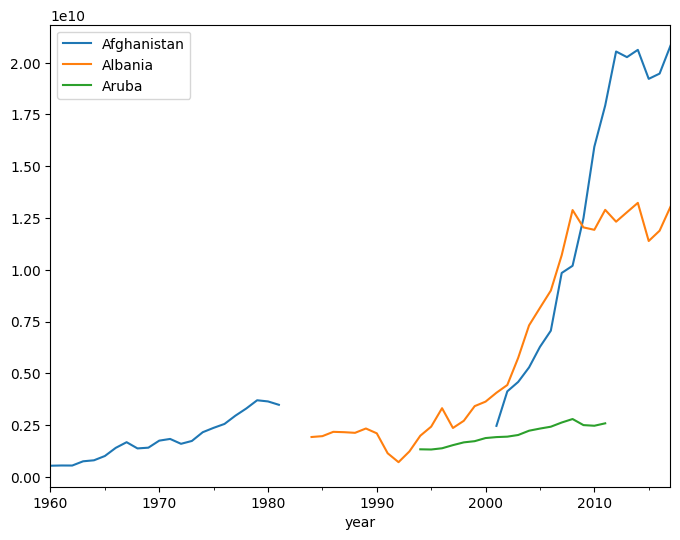

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

#melting year by keeping id_vars to get GDP EASILY
df_melt = pd.melt(wb, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')

#converting year from txt to datetime 
#so matplotlib can correctly interpret it on the x-axis and display time-based plots with proper scaling and formatting.
df_melt['year'] = pd.to_datetime(df_melt['year'])

def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Aruba
    fig, ax = plt.subplots(figsize=(8,6))
    #subplots create a figure and one or more axes(plot areas)
    #fig=whole figure, ax=the area where data is drawn

    df_melt[(df_melt['Country Name'] == 'Afghanistan') | 
            (df_melt['Country Name'] == 'Albania') | 
            (df_melt['Country Name'] == 'Aruba')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax) #ax=ax draws the plot on existing chart
    ax.legend(labels=['Afghanistan', 'Albania', 'Aruba']) #legend is a small box that explains what each line is
    
plot_results('GDP')



Afghanistan and Albania have missing data, which show up as gaps in the results

another one sample

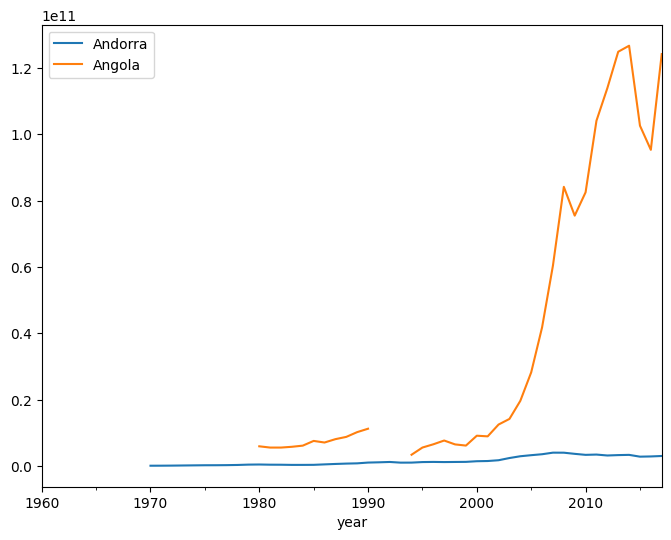

In [59]:
import matplotlib.pyplot as plot
%matplotlib inline

wb_melt=pd.melt(wb, id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'], var_name = 'year',value_name = 'GDP')
wb_melt['year'] = pd.to_datetime(wb_melt['year'])


def plot_results2(column_name):
    fig, ax=plt.subplots(figsize=(8,6))

    wb_melt [(wb_melt['Country Name']== 'Andorra')|(wb_melt['Country Name'] == 'Angola')].groupby('Country Name').plot('year',legend=True,ax=ax)
    ax.legend(labels=['Andorra','Angola'])

plot_results2('GDP')

plot and fill the missing values that is found in the first plot by the mean GDP by

1. calculating mean using groupby,transform(), lambda function() and mean().
2. fill using fillna().

transform() always returns results with same index and shape asoriginal dataframe.

In [60]:
df_melt['GDP_filled']=df_melt.groupby('Country Name')['GDP'].transform(lambda x: x.fillna(x.mean()))

Whereas apply() can return result in different shape or structure, therefore pandas couldn't align it when inserting it back to the original data.

In [61]:
df_melt['GDP_filled']=df_melt.groupby('Country Name')['GDP'].apply(lambda x: x.fillna(x.mean()))

TypeError: incompatible index of inserted column with frame index

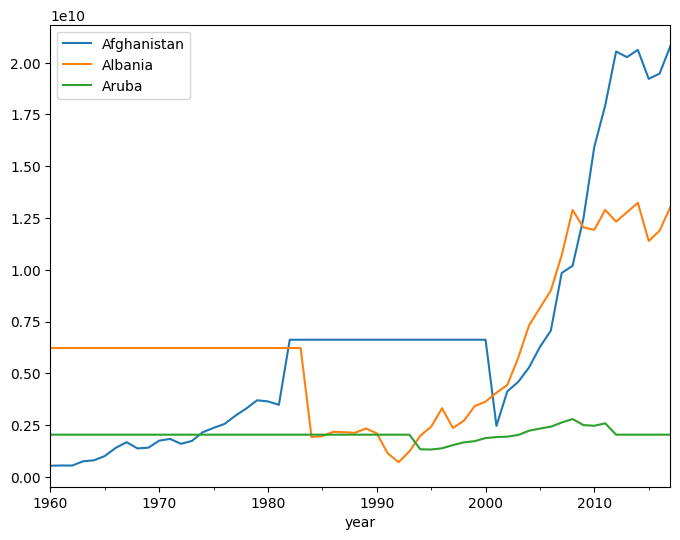

In [62]:
plot_results('GDP_filled')

since taking the mean filling method is not so effective because of the varying mean over time, we can try forward filling.

forwardfill() is the func used to fill missing cells with the recent previous values till that missing values are found.

In [63]:
# Use forward fill to fill in missing GDP values


df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill')

/tmp/ipykernel_36/1128604010.py:4: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill')
/tmp/ipykernel_36/1128604010.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill')


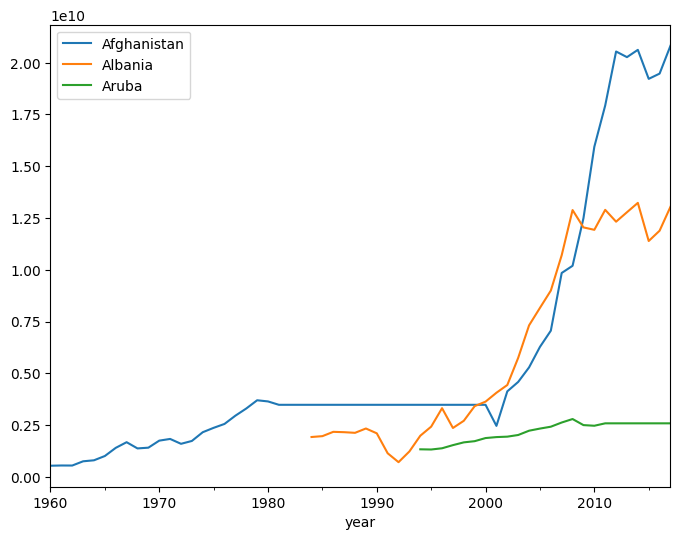

In [64]:
plot_results('GDP_ffill')

in ffill also, aruba and albania has missing values

backward fill is where the later on datas are filled within missing cells.

it can either be done manually or 

run the pipeline if system is down and missing values occur in between.

In [65]:
df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='bfill')

/tmp/ipykernel_36/4146098521.py:1: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='bfill')
/tmp/ipykernel_36/4146098521.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='bfill')


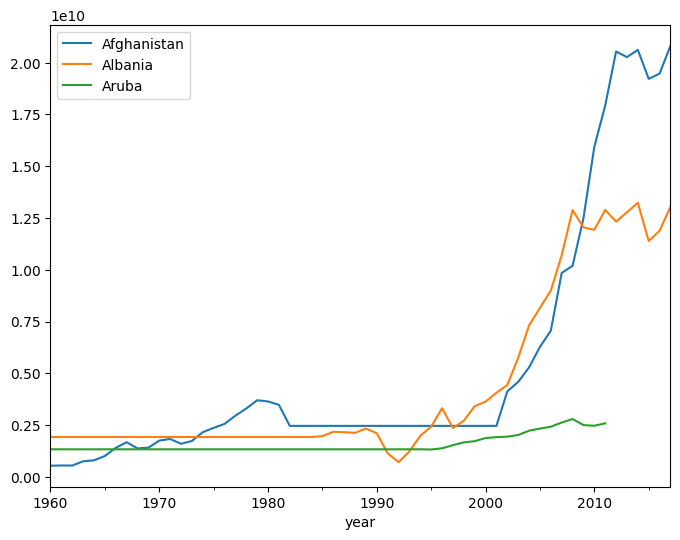

In [66]:
plot_results('GDP_bfill')

in bfill, aruba has missing values, so we try to do both the fills together.

In [67]:
df_melt['ffill_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill').fillna(method='bfill')

/tmp/ipykernel_36/80221977.py:1: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_melt['ffill_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_36/80221977.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_melt['ffill_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill').fillna(method='bfill')


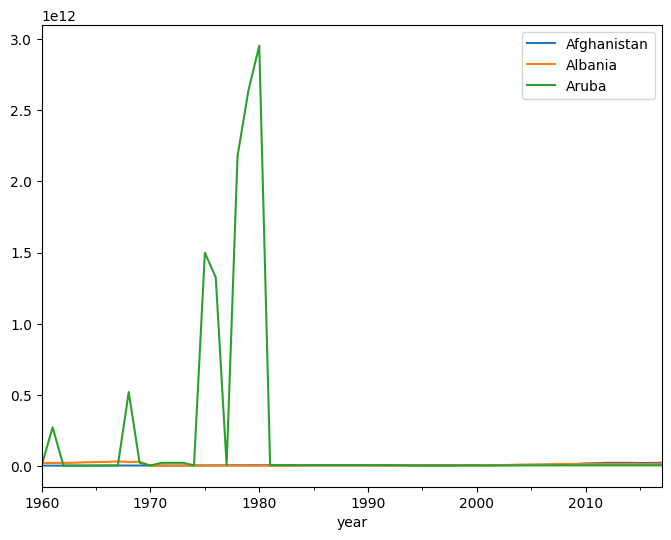

In [68]:
plot_results('ffill_bfill')

checked and seen that there are no missing values

In [69]:
df_melt['ffill_bfill'].isnull().sum()

0

In [70]:
import pandas as pd

**REMOVING DUPLICATE DATA**

removes duplicate data and also takes the count of null values from project data

In [71]:
projects=pd.read_csv('../input/world-bank-dataset-project/projects_data.csv',dtype=str)
projects.drop('Unnamed: 56',axis=1,inplace=True)

projects['totalamt']=pd.to_numeric(projects['totalamt'].str.replace(',',''))
projects['countryname']=projects['countryname'].str.split(';',expand=True)[0] 
#expand: takes the result from list and expand and keep it to seperate columns
#0 : selects the first column to keep the first part of the string

projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

projects[projects['totalamt']>1000000000]['countryname'].nunique()


17

**DUMMY VARIABLES**

The main goal here is to do categorical encoding or hot code encoding where the categorical datas are converted to multiple binary columns for the sake of ML models.

Many ML models take data as numbers, not text. therefore there is a need to convert categorical datas to numerical data. 

For that , we can just easily assign a number to each categorical data like that.

But categorical data doesn't have any inherent order(natural ranking), we need to consider that.

because the project data is not very clean , we need to do EDA , then create dummy variables using get_dummies in pandas.

In [72]:
import pandas as pd
projects = pd.read_csv('../input/world-bank-dataset-project/projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

# keep the project name, lending, sector and theme data
sector = projects.copy()
sector = sector[['project_name', 'lendinginstr', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
          'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
          'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
          'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
          'mjtheme4name', 'mjtheme5name']]

In [73]:
# output percentage of values that are missing
100 * sector.isnull().sum() / sector.shape[0]

project_name      0.000000
lendinginstr      1.348093
sector1           0.000000
sector2          47.791539
sector3          64.450899
sector4          76.019290
sector5          85.132617
sector            3.496274
mjsector1       100.000000
mjsector2       100.000000
mjsector3       100.000000
mjsector4       100.000000
mjsector5       100.000000
mjsector          3.496274
theme1            0.000000
theme2           46.005042
theme3           58.987286
theme4           71.317405
theme5           83.954406
theme           100.000000
goal             33.510522
financier        61.310829
mjtheme1name    100.000000
mjtheme2name    100.000000
mjtheme3name    100.000000
mjtheme4name    100.000000
mjtheme5name    100.000000
dtype: float64

most of the columns like mjsector1 to mjsector5 and the theme has full of null values,but sector 1 looks promising enough to go forward. so listing it out by sorting and taking its unique values

then converts those values into a python list.

In [74]:
uniquesectors1 = sector['sector1'].sort_values().unique()
uniquesectors1

array(['!$!0', '(Historic)Agency reform!$!50!$!AG',
       '(Historic)Agricultural credit!$!100!$!AC', ...,
       'Workforce Development and Vocational Education!$!96!$!EW',
       'Workforce Development and Vocational Education!$!98!$!EW',
       'Workforce Development and Vocational Education!$!99!$!EW'],
      dtype=object)

len() simply gives you the number of rows in a DataFrame (or the number of elements in a Series).

In [75]:
print('Number of unique values in sector1:', len(uniquesectors1))

Number of unique values in sector1: 3060


we again clean these data removing unnessary patterns using replace

we got 156 unique values here which we can convert to dummy variables if we need to use that in a supervised machine learning model.You'd still have to train and test a model to see if those are good features.

if there is a pattern of data that you want to remove, use regular expression **regex** and put in replace() .

In [76]:
import numpy as np
#the first value is replaced by np.nan
sector['sector1']=sector['sector1'].replace('!$!0',np.nan)

#you can use regex=true show a specific pattern, combine it with replace and remove it
sector['sector1']=sector['sector1'].replace('!.+','',regex=True)

sector['sector1'] = sector['sector1'].replace('^(\(Historic\))', '', regex=True)

print('Number of unique sectors after cleaning:', len(list(sector['sector1'].unique())))
print('Percentage of null values after cleaning:', 100 * sector['sector1'].isnull().sum() / sector['sector1'].shape[0])

Number of unique sectors after cleaning: 156
Percentage of null values after cleaning: 3.4962735642262164


here dummy variables are created as True/False that is represented in boolean values meaning true = 1,false=0

In [77]:
import pandas as pd
dummies = pd.DataFrame(pd.get_dummies(sector['sector1']))

projects['year'] = projects['boardapprovaldate'].dt.year #extracts year from date format and makes a column
df = projects[['totalamt','year']] #creating a df from projects
df_final = pd.concat([df,dummies],axis=1) #concatenating df to dummies

df_final.head()

,totalamt,year,Adult; Basic and Continuing Education,Agency reform,Agricultural Extension; Research; and Other Support Activities,Agricultural credit,Agricultural extension,Agricultural markets; commercialization and agri-business,Agriculture adjustment,Agro-industry,...,Urban environment,Urban housing,Urban management,Urban transport,Urban water supply,Vocational training,Waste Management,Water Supply,Water supply and sanitation adjustment,Workforce Development and Vocational Education
0,0,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,200000000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,58330000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,20000000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,100000000,2018.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


if you want 1 and 0 in specific since that was our goal, we can give dtype = int

In [78]:
dummies = pd.DataFrame(pd.get_dummies(sector['sector1']),dtype=int)

projects['year'] = projects['boardapprovaldate'].dt.year #extracts year from date format and makes a column
df = projects[['totalamt','year']] #creating a df from projects
df_final = pd.concat([df,dummies],axis=1) #concatenating df to dummies

df_final.head()

,totalamt,year,Adult; Basic and Continuing Education,Agency reform,Agricultural Extension; Research; and Other Support Activities,Agricultural credit,Agricultural extension,Agricultural markets; commercialization and agri-business,Agriculture adjustment,Agro-industry,...,Urban environment,Urban housing,Urban management,Urban transport,Urban water supply,Vocational training,Waste Management,Water Supply,Water supply and sanitation adjustment,Workforce Development and Vocational Education
0,0,2018.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200000000,2018.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58330000,2018.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20000000,2018.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100000000,2018.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


melt helps us find missing values easily so we could do bfill and ffill to fill in  missing values

**FINDING OUTLIERS**

An outlier is a data point that significantly deviates from the rest of the observations in a dataset.

First , we look the data at a 1-D perspective , then a 2-D perspective

cleaning data and then finding outliers using boxplot's turkey rule

In [79]:
import pandas as pd
gdp = pd.read_csv('../input/world-bank-dataset-project/gdp_data.csv',skiprows=4)

#removed all null values columns
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'],inplace = True,axis=1)

population =  pd.read_csv('../input/world-bank-dataset-project/population_data.csv',skiprows=4)

population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)

#reshapes data from wide format to long format
gdp_melt = gdp.melt(id_vars='Country Name',var_name='year',value_name='gdp')

#using bfill and ffill to fill in missing gdp values in the melted gdp data
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

#similarily for population data
population_melt = population.melt(id_vars='Country Name',var_name='year',value_name='population')

#using bfill and ffill
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

#merge population and gdp data int one df
df_country = gdp_melt.merge(population_melt, on = ('Country Name','year'))

#filter data for year 2016
df_2016 = df_country[df_country['year']=='2016']

df_2016.head(10)


/tmp/ipykernel_36/3453255083.py:15: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_36/3453255083.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_36/3453255083.py:21: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  population_melt['population'] = population_me

,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14789,Arab World,2016,2.500164e+12,406452690.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0


box plot of gdp values and population values

**BOXPLOT**

boxplotting is generally used to find outliers.
it uses Turkey Rule where the IQR will be the box.

it has range for plotting data in which the plot is divided into 4 equal sections Q1,median,Q3,Q4.

whatever comes out of the range is considered an outlier.

Tukey’s rule → Outlier = value < Q1 − 1.5×IQR or > Q3 + 1.5×IQR 

Tukey’s rule = boxplot’s rule.

Boxplots are built on quartiles + IQR.

Whiskers usually extend to the last data point within Tukey’s range.

Any point beyond whiskers → outlier by Tukey’s rule.

So when you see a boxplot, you’re directly seeing Tukey’s rule in action.

using the **turkey rule**, we find outliers by

1. first taking the first quartile
2. then the third quartile
3. then inter quartile by taking the first and third quartile's difference
4. taking the max and min value

criteria: whatever is outside the min and max boundary is an outlier

Quartile → data split into 4 equal parts 

Interquartile Range (IQR) → middle 50% spread (Q3–Q1) 

It shows → variability & central clustering of data 

Whiskers (one word) → range 

#note for output

The whiskers are the short horizontal lines extending from the box at the bottom and top of the blue rectangle (the box).

They show the range of data within 1.5×IQR from Q1 (bottom of box) and Q3 (top of box).

The dots/circles above the top whisker are outliers, values beyond 1.5×IQR.

So in the image, the tiny vertical lines at the top and bottom of the box (just before the first circles appear) are the whiskers.

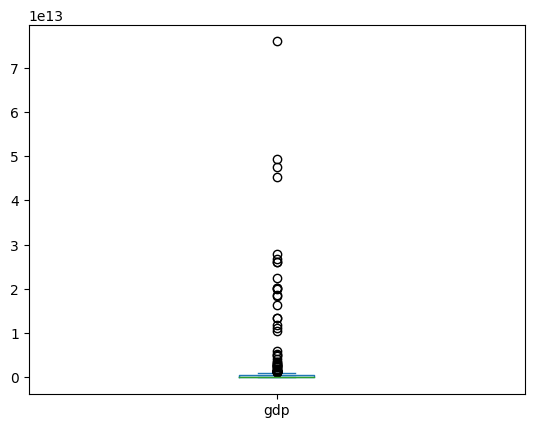

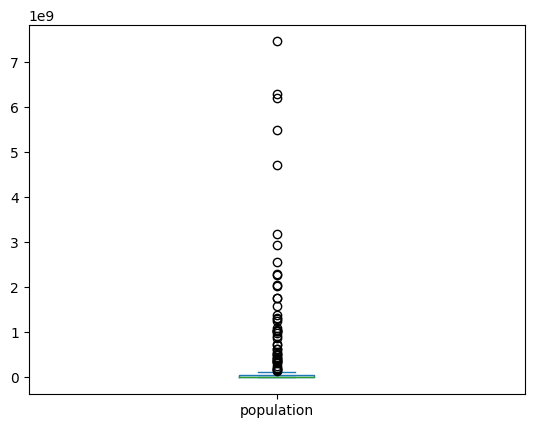

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

# Make a boxplot of the population data for the year 2016
df_2016.plot('population',kind='box');

# Make a boxplot of the population data for the year 2016
df_2016.plot('gdp',kind='box');


In [81]:
population_2016 = df_2016[['Country Name','population']]

# Calculate the first quartile of the population values for 2016
Q1 = population_2016['population'].quantile(0.25)

# Calculate the third quartile of the population values for 2016
Q3 = population_2016['population'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1


# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

population_outliers = population_2016[(population_2016['population'] >max_value) | (population_2016['population']<min_value)]

population_outliers

,Country Name,population
14789,Arab World,4.064527e+08
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14843,East Asia & Pacific (excluding high income),2.053299e+09
14844,Early-demographic dividend,3.170658e+09
14845,East Asia & Pacific,2.298727e+09
14846,Europe & Central Asia (excluding high income),4.132349e+08
14847,Europe & Central Asia,9.116863e+08
14850,Euro area,3.406174e+08


Clearly many of these outliers are not from countries;there are non-country values.

Remove these data points and redo the analysis. There's a list provided below of the 'Country Name' values that are not actually countries.

In [82]:
# remove the rows from the data that have Country Name values in the non_countries list
# Store the filter results back into the df_2016 variable

non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
'Pacific island small states']


#filerting(removing) non-countries from the original data with ~[bitwise NOT] boolean indexing and isin function
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]  # ~ -> gives the opposite result; if isin returns true for all non-countries , then ~ takes all false values ie. country values
df_2016


,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
...,...,...,...,...
15043,Kosovo,2016,6.715487e+09,1816200.0
15044,"Yemen, Rep.",2016,1.821333e+10,27584213.0
15045,South Africa,2016,2.957627e+11,56015473.0
15046,Zambia,2016,2.095475e+10,16591390.0


#rerun the turkey code with this filtered data to find the population on outliers.


In [83]:
population_2016 = df_2016[['Country Name','population']]

# Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method 
Q1 = population_2016['population'].quantile(0.25)

# Calculate the third quartile of the population values
Q3 = population_2016['population'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14825,"Congo, Dem. Rep.",7.873615e+07
14837,Germany,8.234867e+07
14849,"Egypt, Arab Rep.",9.568868e+07
14854,Ethiopia,1.024032e+08
14859,France,6.685977e+07
14863,United Kingdom,6.559556e+07
14888,Indonesia,2.611155e+08


similarly we do for gdp data

In [84]:
gdp_2016 = df_2016[['Country Name','gdp']]

# Calculate the first quartile of the population values
# HINT: you can use the pandas quantile method 
Q1 = gdp_2016['gdp'].quantile(0.25)

# Calculate the third quartile of the population values
Q3 = gdp_2016['gdp'].quantile(0.75)

# Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers

,Country Name,gdp
14791,Argentina,5.548609e+11
14795,Australia,1.208039e+12
14796,Austria,3.908000e+11
14799,Belgium,4.675455e+11
14811,Brazil,1.793989e+12
14817,Canada,1.535768e+12
14819,Switzerland,6.687453e+11
14822,China,1.119099e+13
14837,Germany,3.477796e+12
14852,Spain,1.237255e+12


To find countries that are in population_outliers and gdp_outliers

In [85]:
#Find the countries that are in both population_outlier and gdp_outlier
list(set(population_outliers['Country Name']).intersection(gdp_outliers['Country Name']))

['Nigeria',
 'Brazil',
 'Japan',
 'France',
 'United Kingdom',
 'Italy',
 'Iran, Islamic Rep.',
 'Germany',
 'Thailand',
 'India',
 'China',
 'Mexico',
 'Indonesia',
 'United States',
 'Turkey',
 'Russian Federation']

While looking from 2D perspective, they might not really be truly outliers.Hence we check both population_outlier and gdp_outlier seperately 

In [86]:
list(set(population_outliers['Country Name'])-set(gdp_outliers['Country Name']))

['Philippines',
 'Bangladesh',
 'Pakistan',
 'Vietnam',
 'Egypt, Arab Rep.',
 'Ethiopia',
 'Congo, Dem. Rep.']

In [87]:
list(set(gdp_outliers['Country Name'])-set(population_outliers['Country Name']))

['Australia',
 'Sweden',
 'Argentina',
 'Korea, Rep.',
 'Saudi Arabia',
 'Netherlands',
 'Spain',
 'Canada',
 'Switzerland',
 'Austria',
 'Poland',
 'Venezuela, RB',
 'Belgium']

**2-D Analysis**

To get a 2D Analysis , we need to plot GDP vs Population data inluding Country Name for each point

#enumerate
#python func that loops 

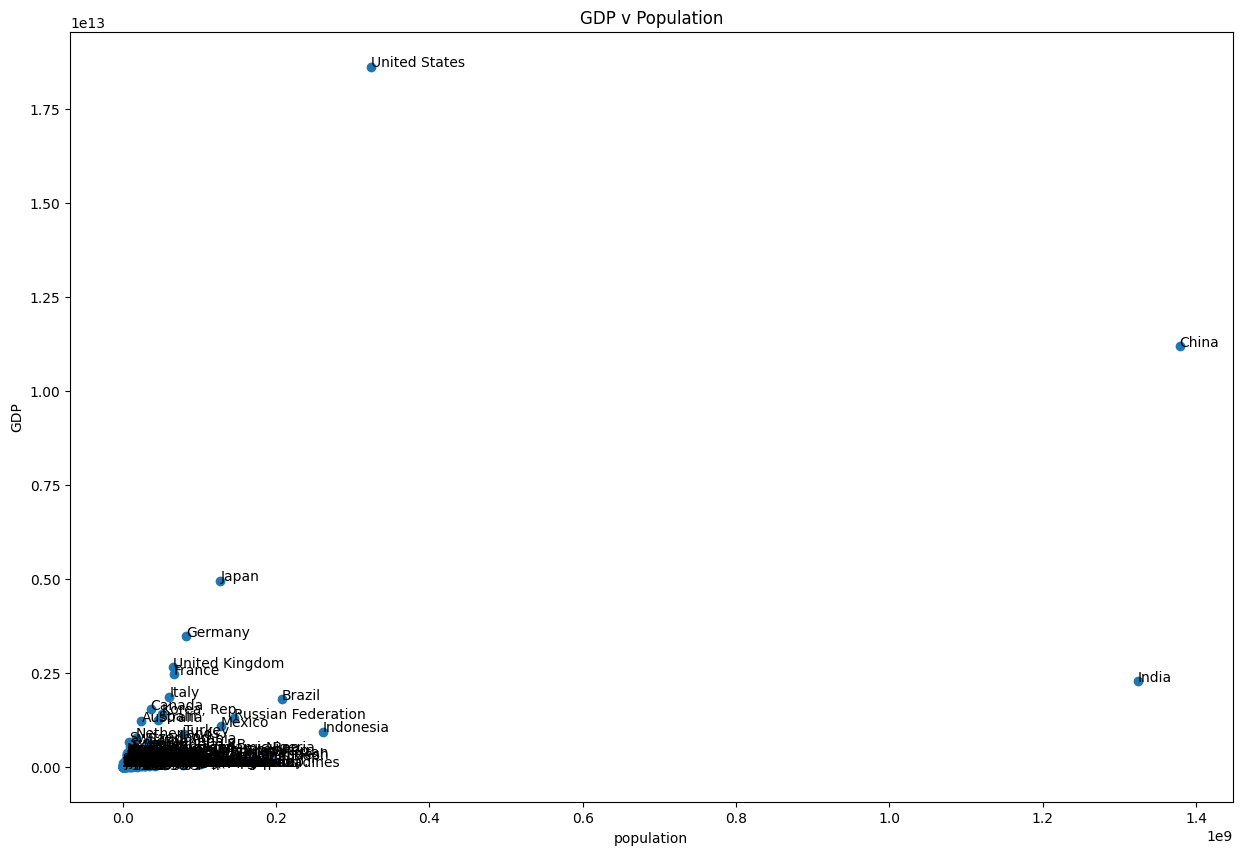

In [88]:
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x,y) #scatter plot method plots x,y values we give on the figure
plt.title('GDP v Population')
plt.xlabel('population')
plt.ylabel('GDP')

for i, txt in enumerate(text): #enumerate:python func that loops through text for index and its value
 ax.annotate(txt,(x[i],y[i]))

The United States, China, and India have such larger values that it's hard to see this data. Let's take those countries out for a moment and look at the data again.

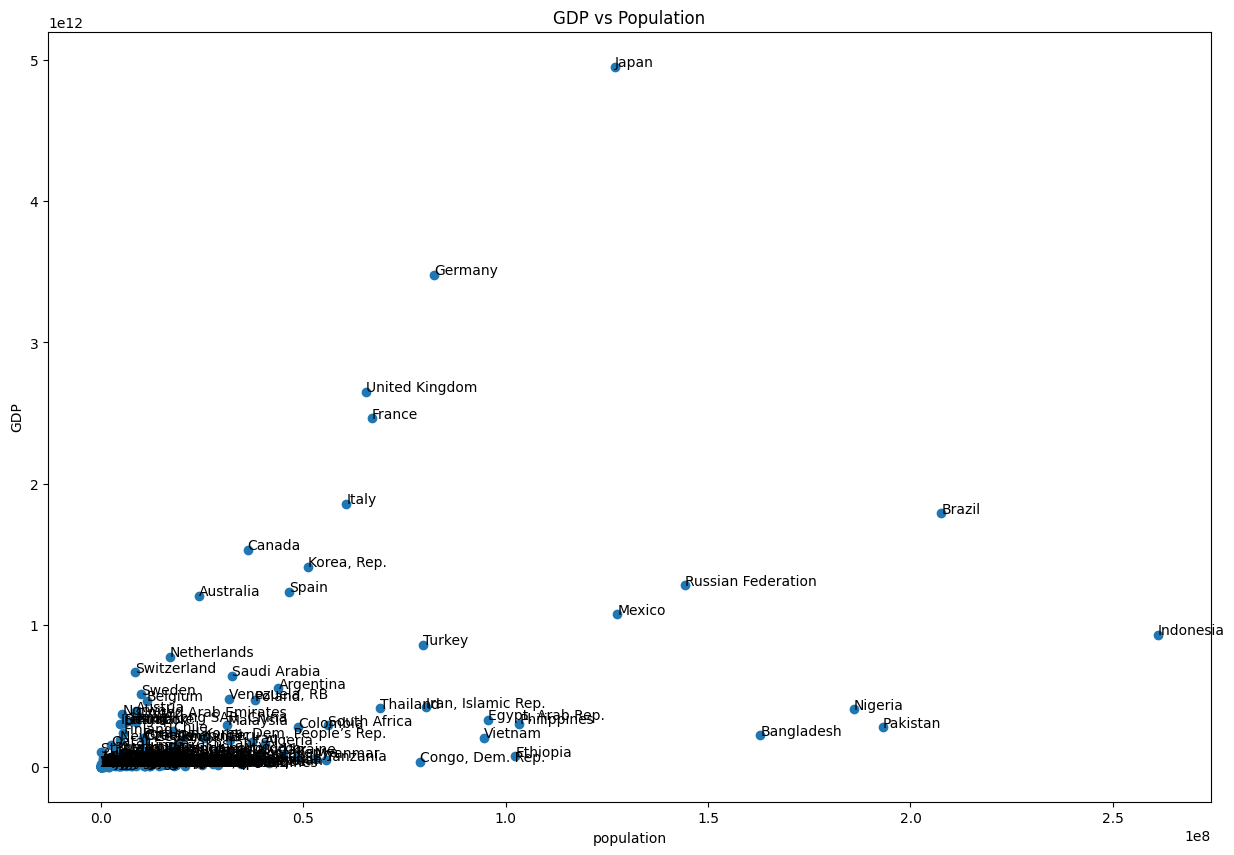

In [89]:
df_no_large = (df_2016['Country Name'] != 'United States') & (df_2016['Country Name'] != 'India') & (df_2016['Country Name'] != 'China')
x = list(df_2016[df_no_large]['population'])
y = list(df_2016[df_no_large]['gdp'])
text = df_2016[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

**PREDICTION**

here, we fit a ML(regression) model to predict GDP values based on a country's population

To predict gdp, it is taken as target and population as its input feature.

here univariate regression is done where model learns the linear relationship  between x(input) and y(output).

#logic

*y=m⋅X+b*

m=slope (how much GDP changed per unit population)
b=intercept(GDP when population = 0)

#note

ML models like sklearn expects 2D arrays

To convert our data from 1D to 2D, we use
reshape(-1,1) : makes the array a column with as many rows as needed

-1 → means “figure out this dimension automatically based on data length.”

1 → means “make it a single feature column.”

eg: By default, df,population.values is 1D, shape = (n,).this array is turned to column therefore turned to 2D.similarily done in gdp(target value) but target values can either be in 1D or 2D depending on the model.

general format for model.fit():
model.fit(X, y, sample_weight=None)


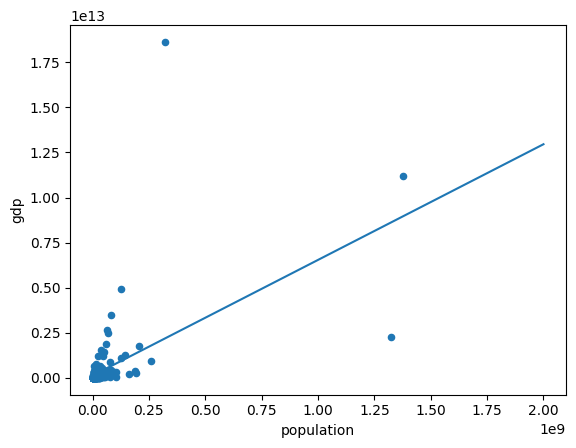

In [90]:
import numpy as np
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(df_2016['population'].values.reshape(-1,1),df_2016['gdp'].values.reshape(-1,1)) #here, population is taken as X and gdp as y


inputs = np.linspace(1,2000000000, num=50) #python automatically took population as input by model.fit() func, so here we just arrange the input as 50 evenly spaced numbers of population from 1 to 2000000000
predictions = model.predict(inputs.reshape(-1,1))

df_2016.plot('population','gdp',kind='scatter') #here x(input)=popuation,y(target)=gdp
plt.plot(inputs,predictions) #plots regression line on top of scatter plot; #note : if you want to plot seperately , use ax.plot()


#based on the prev output

#note 
Matplotlib keeps a concept of a “current figure and axes”.

Any new plot (plt.plot, plt.scatter, etc.) is drawn on the same axes unless you explicitly create a new figure/axes.

ie why ,regression line was  automatically plotted upon scatter plot

**#removes the US to see the line going down in the model**

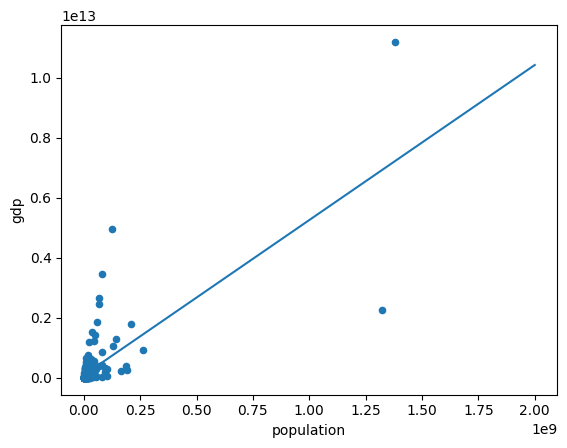

In [91]:
#filtering US out and plotting the rest
df_2016[df_2016['Country Name'] != 'United States'].plot('population', 'gdp', kind='scatter')

model.fit(df_2016[df_2016['Country Name'] != 'United States']['population'].values.reshape(-1, 1), 
          df_2016[df_2016['Country Name'] != 'United States']['gdp'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)

**ELIMINATING OUTLIERS**

our job as a data engineer is to code algorithms that can eliminate outliers from a data while a data scientist's job is to decide what counts as an outlier and what does not.

/tmp/ipykernel_36/1824666279.py:16: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_36/1824666279.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_36/1824666279.py:20: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  population_melt['population'] = population_me

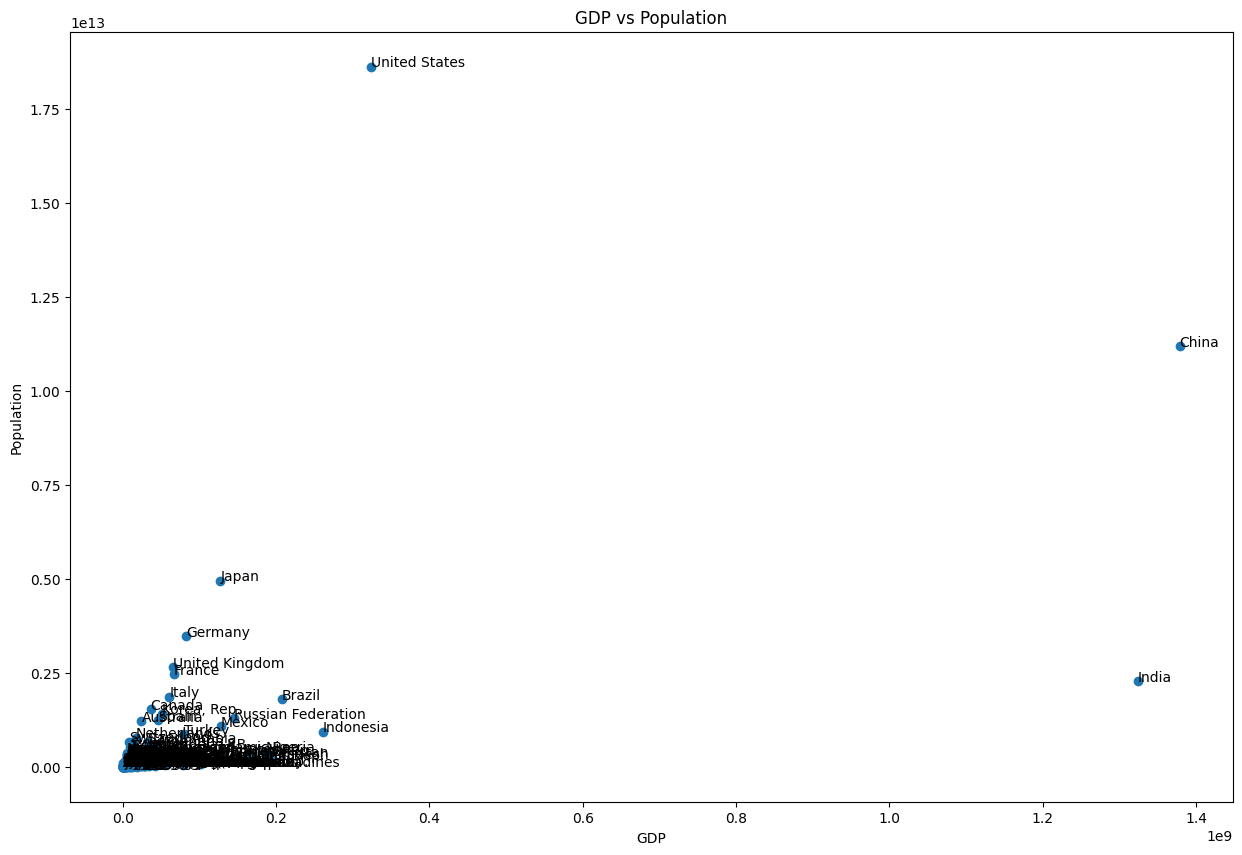

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#read files inside and do basic wrangling
gdp = pd.read_csv('../input/world-bank-dataset-project/gdp_data.csv',skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


population = pd.read_csv('../input/world-bank-dataset-project/population_data.csv',skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


gdp_melt = gdp.melt(id_vars=['Country Name'],var_name='year',value_name='gdp')
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')


population_melt = population.melt(id_vars=['Country Name'],var_name='year',value_name='population')
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')


df_country = gdp_melt.merge(population_melt, on=('Country Name','year'))


df_2016 = df_country[df_country['year']=='2016']


non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']


#remove non_countries from data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]

#plot the data
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x,y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i,txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))


**now, to eliminate the outliers, we write a function that uses turkey rule to eliminate outliers from an array of data**

to do so, we need a function where we can give a dataframe and particular columns so that the function removes the entire row containing outlier.

#logic

1. create a function that can take df,and columns
2. this function should remove rows based on columns given

df=df_2016

columns=population,gdp

3. turkey rule should be used to first find outliers
4. apply function with the found outliers

In [93]:
#defining a func that uses turkey_rule to detect outliers in a dataframe column
def tukey_rule(data_frame, column_name):
    data = data_frame[column_name]
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)

    IQR = Q3-Q1

    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR

    return data_frame[(data_frame[column_name]<max_value) & (data_frame[column_name]>min_value)]

In [95]:
df_outlier_removed = df_2016.copy()


#use turkey_rule function to make a new dataframe(df_outlier_removed) with gdp and population outliers removed
for column in ['population','gdp']:
    df_outlier_removed = tukey_rule(df_outlier_removed, column)

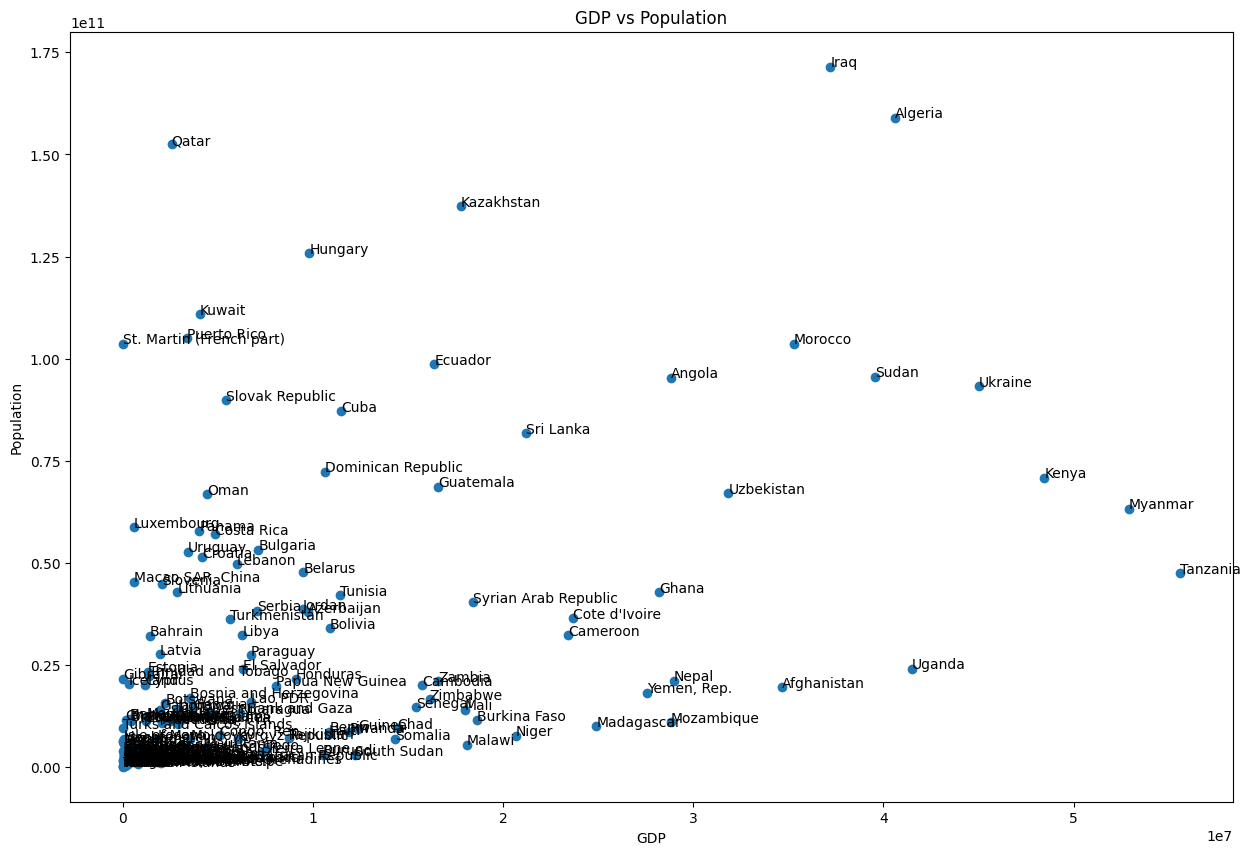

In [96]:
#plot the data
x = list(df_outlier_removed['population'])
y = list(df_outlier_removed['gdp'])
text = df_outlier_removed['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))
    

**SCALING DATA**

scaling is a preprocessing step in ml model usage to put all datas with different ranges to a single range

generally, we do **normalization** and **standardization** for scaling depending on the type of data

standardization : preprocessing data to take mean as 0 and std deviation as 1

normalization(min-max scaling) : making data in between a range of 0 and 1

*purpose of scaling*

it is for efficency of models to handle data 

need
1.  larger values tend to dominate if not scaled
2.  optimization algorithms works faster when features  are on similar scale

In [97]:
#take gdp and population data and do some data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('../input/world-bank-dataset-project/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('../input/world-bank-dataset-project/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income','Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]

# show the first ten rows
print('first ten rows of data')
df_2016.head(10)


first ten rows of data


/tmp/ipykernel_36/3876581834.py:20: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_36/3876581834.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_36/3876581834.py:27: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  population_melt['population'] = population_me

,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0
14794,Antigua and Barbuda,2016,1.460145e+09,100963.0


*normalize the data*

#normalization formula

x′=x−min(x)/max(x)−min(x)

where x is value of gdp

for this formula to be implemented, we need 
1. a function that takes all the gdp data and returns its min and max values
2. a function that actually gives normalized value when putting it in the function 

In [98]:
#creating a function to return min,max values
def x_min_max(data):
    x_min = min(data)
    x_max = max(data)
    return x_min,x_max

x_min_max(df_2016['gdp'])

(36572611.8853148, 18624475000000.0)

In [99]:
#creating a function that returns a normalized value from actual function
def normalize(x, x_min, x_max):
    x_min = min(x)
    x_max = max(x)
    for i in x:
        return (x - x_min) / (x_max - x_min)

scaled_data = normalize(df_2016['gdp'],min(x),max(x))
scaled_data

14784    0.000137
14785    0.001043
14786    0.005117
14787    0.000636
14788    0.000153
           ...   
15043    0.000359
15044    0.000976
15045    0.015878
15046    0.001123
15047    0.000890
Name: gdp, Length: 217, dtype: float64

#we did create seperate functions;

because to train an ml model,we need to give gdp data each time to make it predict.

therefore we need to normalize each new gdp data.

also we need to store the parameters before taking in new gdp value ; only that way you can scale new data while making predictions.

similarily for standard deviation, we store std deviation and mean as parameters to standardize data.

**creating a class to make any ml model predict**

note that we also need to keep track of min and max values ,the best way to do it is to create a class

__A small note on class:__

class is the blueprint of objects tht you further create.

 __init__

it is a special method(constructor) that constructs objects initial state(attributes).

runs automatically when i create an object.

purpose: initialize objects attributes with the values you pass.

__self__

it is a special object that connects objects to init.

it is the link between object and class.

__initialization__

setting up object with its starting values(attributes).

__self.value__

store the value inside the object with its starting values.eg:self.params store (min,max) tuple of each column

In [100]:
class Normalizer():
    def __init__(self, dataframe): #dataframe is the parameter you pass to init ie; whatever you pass when you create an object
        """
        Initialize with a dataframe.
        Compute min and max for each column and store in self.params
        """
        self.params = [] #stores [min,max] values of each columns
        self.columns = dataframe.columns  
        for column in dataframe.columns:
            self.params.append(self.x_min_max(dataframe[column])) #the self.params know it stores the min,max tuple while appended and function is defined below

    def x_min_max(self, data):
        """
        Calculate min and max for a single column/series
        """
        minimum = data.min()  
        maximum = data.max()  
        return minimum, maximum

    def normalize_data(self, x):
        """
        Normalize a data point x using min-max scaling
        x = list of values in same column order as dataframe
        """
        normalized = []
        for i, value in enumerate(x): #ith column
            x_max = self.params[i][1] #second element of tuple (min,max) should be maximum
            x_min = self.params[i][0] #first element of tuple (min,max) should be  minimum 
            normalized.append((x[i] - x_min) / (x_max - x_min))
        return normalized

In [101]:
#class is being called,Python makes a new object
gdp_normalizer = Normalizer(df_2016[['gdp', 'population']])

here, the first tuple shows the (min_gdp,max_gdp) and second tuple shows (min_population,max_population)

In [102]:
gdp_normalizer.params

[(36572611.8853148, 18624475000000.0), (11097.0, 1378665000.0)]

here, normalization calculation data is done onto the values given

In [103]:
gdp_normalizer.normalize_data([13424475000000.0, 1300000000])

[0.7207969507229194, 0.9429407193285986]

**FEATURE ENGINEERING**

it is basically adding new features to current datasets .

features can include even new calculations.

so here, we do feature engineering on gdp and population data itself where we create gdp per capita by diving gdp per country by its population.

In [104]:
#do data wrangling in gdp and population data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('../input/world-bank-dataset-project/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('../input/world-bank-dataset-project/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only','East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
  'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]
df_2016.reset_index(inplace=True, drop=True)

/tmp/ipykernel_36/3680712514.py:20: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_36/3680712514.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_36/3680712514.py:26: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  population_melt['population'] = population_me

In [105]:
# create a new feature called gdppercapita, 
#      which is the gdp value divided by the population value for each country

df_2016['gdppercapita'] = df_2016['gdp'] / df_2016['population']

In [106]:
df_2016['gdppercapita']

0      24655.737223
1        561.778746
2       3308.772828
3       4131.872341
4      37231.815671
           ...     
212     3697.548026
213      660.280885
214     5280.017633
215     1262.989682
216     1029.076649
Name: gdppercapita, Length: 217, dtype: float64

# **LOAD**

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('../input/world-bank-dataset-project/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('../input/world-bank-dataset-project/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name', 'Country Code'], 
                    var_name='year', 
                    value_name='gdp')

gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby(['Country Name', 'Country Code'])['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name', 'Country Code'], 
                                  var_name='year', 
                                  value_name='population')

population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

df_indicator = gdp_melt.merge(population_melt,on=('Country Name','Country Code','year'))

non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
'Caribbean small states',
 'Pacific island small states']

df_indicator  = df_indicator[~df_indicator['Country Name'].isin(non_countries)]
df_indicator.reset_index(inplace=True, drop=True)

df_indicator.columns = ['countryname', 'countrycode', 'year', 'gdp', 'population']

df_indicator.head()

/tmp/ipykernel_36/2041078976.py:18: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby(['Country Name', 'Country Code'])['gdp'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_36/2041078976.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby(['Country Name', 'Country Code'])['gdp'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipykernel_36/2041078976.py:24: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  populatio

,countryname,countrycode,year,gdp,population
0,Aruba,ABW,1960,1.916242e+09,54211.0
1,Afghanistan,AFG,1960,5.377778e+08,8996351.0
2,Angola,AGO,1960,1.857319e+10,5643182.0
3,Albania,ALB,1960,1.857319e+10,1608800.0
4,Andorra,AND,1960,1.857319e+10,13411.0


pycountry is a library that has several country names and its ISO codes.

here, in the code below, our main goal is to match country names to its ISO codes as it is not given in the dataset.

for that we imported defaultdict to from collections
so that any missing keys will get filled by an empty string or whatever we give to it accordingly.

    default dict creates an empty dictionary with a rule for missing keys basically.
    
 then key-value pairs are added accordingly in the for loop part.



In [108]:
!pip install pycountry
from pycountry import countries

import pandas as pd

df_projects = pd.read_csv('../input/world-bank-dataset-project/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

df_projects['countryname'] = df_projects['countryname'].str.split(';').str.get(0)

# set up the libraries and variables
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['countryname'].drop_duplicates().sort_values(): #loops through each country
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        country_not_found.append(country)
        
# run this code cell to load the dictionary

country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}


#here the remaining countries that is not recognized by pycountry is also added to the dictionary
project_country_abbrev_dict.update(country_not_found_mapping)

#using the dict you created before, a new column is created for ISO code
df_projects['countrycode']=df_projects['countryname'].apply(lambda x:project_country_abbrev_dict[x]) #x is , 'for each country name'

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])

df_projects['year'] = df_projects['boardapprovaldate'].dt.year.astype(str).str.slice(stop=4) #.dt accessor extracts year from each value in the column

df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))

df_projects = df_projects[['id', 'countryname', 'countrycode', 'totalamt', 'year']]

df_projects.head()

,id,countryname,countrycode,totalamt,year
0,P162228,World,WLD,0,2018
1,P163962,Democratic Republic of the Congo,COD,200000000,2018
2,P167672,People's Republic of Bangladesh,BGD,58330000,2018
3,P158768,Islamic Republic of Afghanistan,AFG,20000000,2018
4,P161364,Federal Republic of Nigeria,NGA,100000000,2018


you now have two cleaned dataframes ,

1. df_projects (data from projects dataset)
2. df_indicator(population and gdp data for various years)

but note that there could be countries that indicator data has and project data hasn't..why is it a concern?

we are trying to join the two datasets, so both should have common same formats to merge.

first we try merging using country code and year.here we try to keep all data in df_projects even if its not available in df_indicator.

In [109]:
df_merged = df_projects.merge(df_indicator,how='left',on=['countrycode','year'])

now, we are able to display the contents merged from both the tables and specifically collect year or country type to get its iso code types & gdp and population

In [110]:
df_merged[(df_merged['year'] == '2017') & (df_merged['countryname_y'] == 'Jordan')]

,id,countryname_x,countrycode,totalamt,year,countryname_y,gdp,population
256,P161982,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0
301,P162407,Hashemite Kingdom of Jordan,JOR,147700000,2017,Jordan,4.006831e+10,9702353.0
318,P160103,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0
464,P161905,Hashemite Kingdom of Jordan,JOR,50000000,2017,Jordan,4.006831e+10,9702353.0
495,P163387,Hashemite Kingdom of Jordan,JOR,36100000,2017,Jordan,4.006831e+10,9702353.0
515,P163241,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0


**here we save this to json format**

In [111]:
#countrydata.json will be the filename where your json data will be saved in your directory
df_merged.to_json('countrydata.json',orient='records')

**loading to csv format**

In [112]:
#countrydata.csv is the output filename where this csv data saves in your directory
df_merged.to_csv('countrydata.csv',index=False)

**outputs the dataframe as a sql database file**

for this, we need to create a database file and put the data into the table, to output it as one table.

conn is the connection obj used to interact with the db.
it connects to a worldbank sqlite db file.
if the file doesnt exist, sqlite creates the db automatically.

'merged' here represents the table name created for the df_merged db,index=false doesnt store index of db as column in the table.

con(parameter)=conn(connection obj)
pandas needs this parameter to ensure to '.to_sql()' func which database to write table into.
without it , pandas wouldnt know which db to use.

for example:  

You open a door to the database with conn = sqlite3.connect(...).

.to_sql(..., con=conn) → tells Pandas: “Put this table through that door I just opened.”


In [113]:
import sqlite3

conn = sqlite3.connect('worldbank.db') #connects a sqlite db named 'worldbank.db'

df_merged.to_sql('merged',con=conn,if_exists='replace',index=False) #creates table in sqlite db


18248

here , we read it from sqlite using sql queries to see the table we created.here also pandas need to know the connection. 

In [114]:
pd.read_sql('SELECT * FROM merged WHERE year = "2017" AND countrycode = "BRA"',con=conn).head()

,id,countryname_x,countrycode,totalamt,year,countryname_y,gdp,population
0,P162033,Federative Republic of Brazil,BRA,125000000,2017,Brazil,2.055506e+12,209288278.0
1,P158000,Federative Republic of Brazil,BRA,0,2017,Brazil,2.055506e+12,209288278.0
2,P163868,Federative Republic of Brazil,BRA,250000000,2017,Brazil,2.055506e+12,209288278.0
3,P152285,Federative Republic of Brazil,BRA,0,2017,Brazil,2.055506e+12,209288278.0
4,P147158,Federative Republic of Brazil,BRA,50000000,2017,Brazil,2.055506e+12,209288278.0


Now we can put the df_indicator and df_projects in two seperate tables.

In [115]:
import sqlite3

conn=sqlite3.connect('worldbank.db')

df_indicator.to_sql('indicator',con=conn,if_exists='replace',index=False)
df_projects.to_sql('projects',con=conn,if_exists='replace',index=False)

18248

In [116]:
pd.read_sql('SELECT * FROM projects LEFT JOIN indicator ON \
projects.countrycode = indicator.countrycode AND \
projects.year = indicator.year WHERE \
projects.year = "2017" AND projects.countrycode = "BRA"', con = conn).head()

,id,countryname,countrycode,totalamt,year,countryname,countrycode,year,gdp,population
0,P162033,Federative Republic of Brazil,BRA,125000000,2017,Brazil,BRA,2017,2.055506e+12,209288278.0
1,P158000,Federative Republic of Brazil,BRA,0,2017,Brazil,BRA,2017,2.055506e+12,209288278.0
2,P163868,Federative Republic of Brazil,BRA,250000000,2017,Brazil,BRA,2017,2.055506e+12,209288278.0
3,P152285,Federative Republic of Brazil,BRA,0,2017,Brazil,BRA,2017,2.055506e+12,209288278.0
4,P147158,Federative Republic of Brazil,BRA,50000000,2017,Brazil,BRA,2017,2.055506e+12,209288278.0


In [117]:
# commit any changes to the database and close the database
conn.commit()
conn.close()